In [1]:
#Upload Kaggle JSON file
from google.colab import files
files.upload()
# Placeholder: Upload your kaggle.json file manually.
# This error in cell 1 is because my personal kaggle API is of-course not uploaded with this code,
# but it should work as soon as you set up your own Kaggle API and give access


ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Cell 2: Install Kaggle API client
!pip install -q kaggle


In [3]:
# Cell 3: Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Cell 4: Create directory and change to it
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset


/content/traffic_sign_dataset


In [5]:
# Cell 5: Search for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign


ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         113531       1133  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          14999        289  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1122         32  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
# Cell 6: Download dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 603M/612M [00:06<00:00, 28.9MB/s]
100% 612M/612M [00:06<00:00, 92.6MB/s]
/content


In [7]:
# Cell 7: Unzip and clean up dataset
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv


Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
# Cell 8: Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


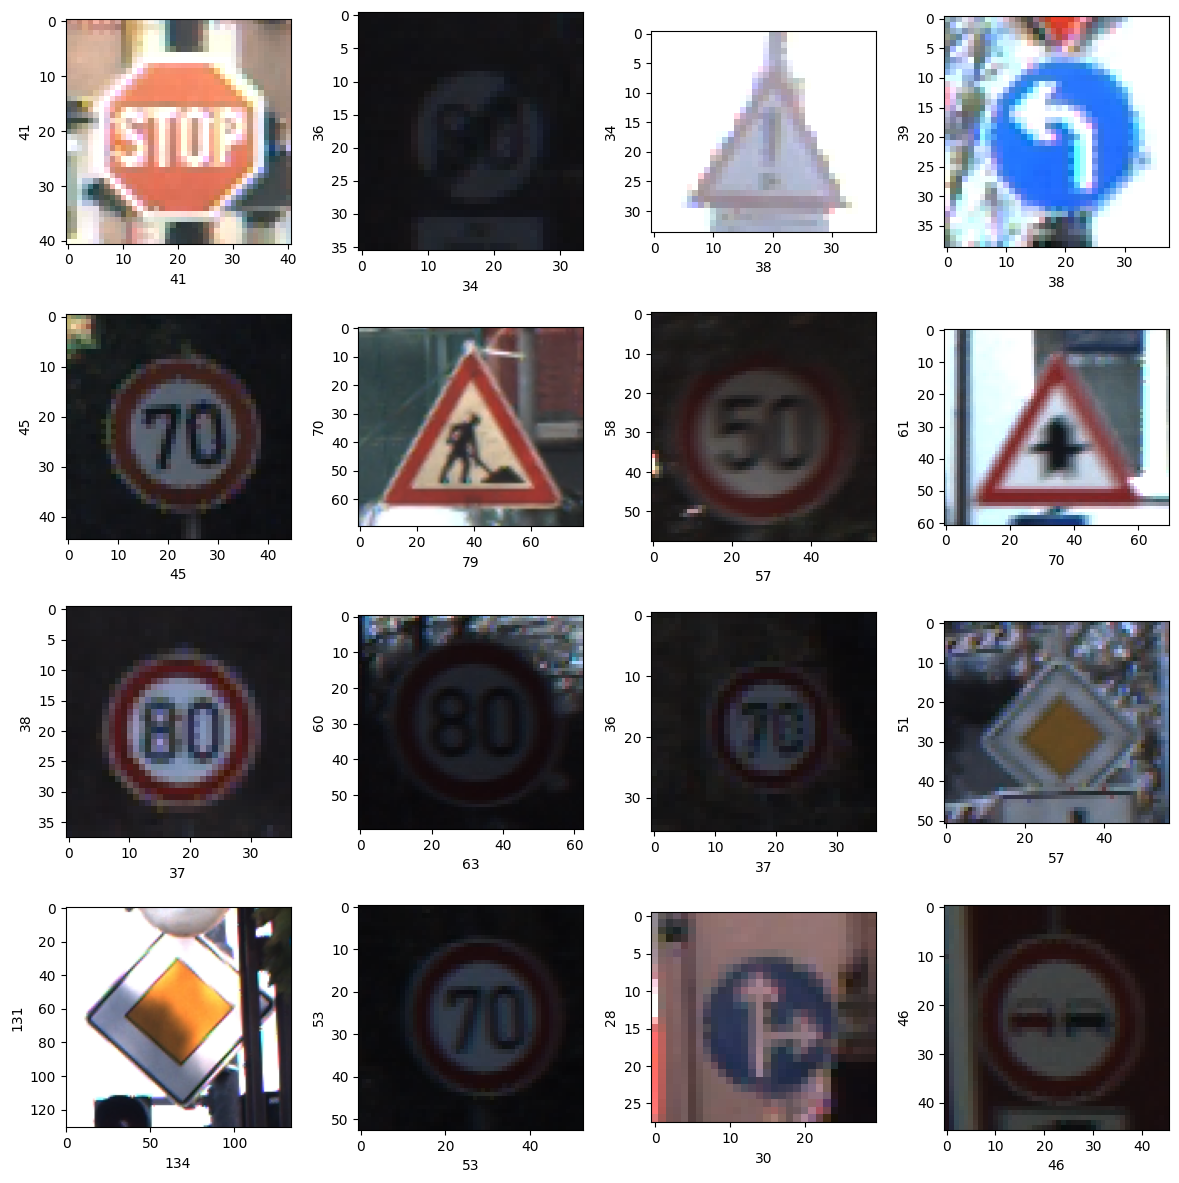

In [9]:
# Cell 9: Visualize dataset images
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)  # Width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)  # Height of image


In [10]:
# Cell 10: Analyze image dimensions
dim1 = []
dim2 = []
for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])
print("Dimension 1 Mean : ", np.mean(dim1), " Dimension 2 Mean : ", np.mean(dim2))


Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [11]:
# Cell 11: Resize images and normalize
images = []
label_id = []
for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)
images = np.array(images) / 255
label_id = np.array(label_id)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
246/246 - 14s - 55ms/step - accuracy: 0.3184 - loss: 2.5100 - val_accuracy: 0.7072 - val_loss: 1.0999
Epoch 2/100
246/246 - 3s - 14ms/step - accuracy: 0.6518 - loss: 1.1276 - val_accuracy: 0.9106 - val_loss: 0.4257
Epoch 3/100
246/246 - 5s - 21ms/step - accuracy: 0.7608 - loss: 0.7494 - val_accuracy: 0.9402 - val_loss: 0.2828
Epoch 4/100
246/246 - 6s - 22ms/step - accuracy: 0.8125 - loss: 0.5889 - val_accuracy: 0.9633 - val_loss: 0.1801
Epoch 5/100
246/246 - 3s - 14ms/step - accuracy: 0.8405 - loss: 0.4917 - val_accuracy: 0.9739 - val_loss: 0.1360
Epoch 6/100
246/246 - 4s - 15ms/step - accuracy: 0.8570 - loss: 0.4405 - val_accuracy: 0.9765 - val_loss: 0.1269
Epoch 7/100
246/246 - 4s - 15ms/step - accuracy: 0.8706 - loss: 0.3925 - val_accuracy: 0.9833 - val_loss: 0.0905
Epoch 8/100
246/246 - 3s - 14ms/step - accuracy: 0.8851 - loss: 0.3553 - val_accuracy: 0.9836 - val_loss: 0.0754
Epoch 9/100
246/246 - 3s - 14ms/step - accuracy: 0.8948 - loss: 0.3301 - val_accuracy: 0.9847 -

<Axes: >

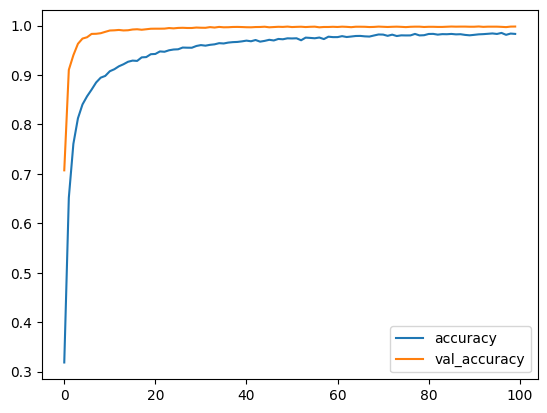

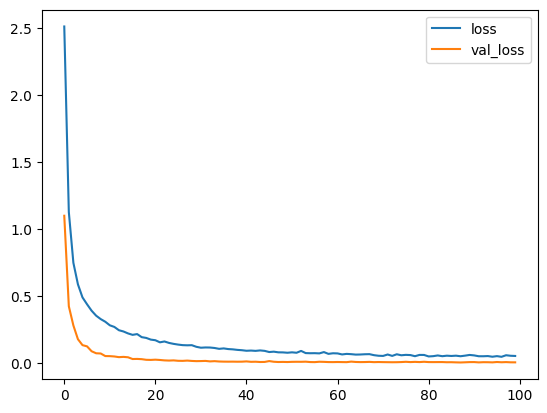

In [18]:
# Cell 12: Split data, convert labels, build and train model
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val), verbose=2)

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()


In [19]:
# Cell 13: Process test images and make predictions
from PIL import Image
def scaling(test_images, test_path):
    images = []
    for x in test_images:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
    images = np.array(images) / 255
    return images

test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv
test_images = scaling(sorted(os.listdir(test_path)), test_path)
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_pred = np.argmax(model.predict(test_images), axis=-1)


rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
# Cell 14: Define labels and visualize results
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vehicles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vehicles',
              'Vehicles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vehicles over 3.5 metric']
img = Image.open(test_path + '/00001.png')
print("Original label : ", all_labels[y_test[8]])
print("Predicted label : ", all_labels[y_pred[8]])


Original label :  Road work
Predicted label :  Road work


In [22]:
# Save the model to a .h5 file
model.save('traffic_sign_model.h5')


In [23]:
from google.colab import files

# Download the model file
files.download('traffic_sign_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>